In [22]:
%pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


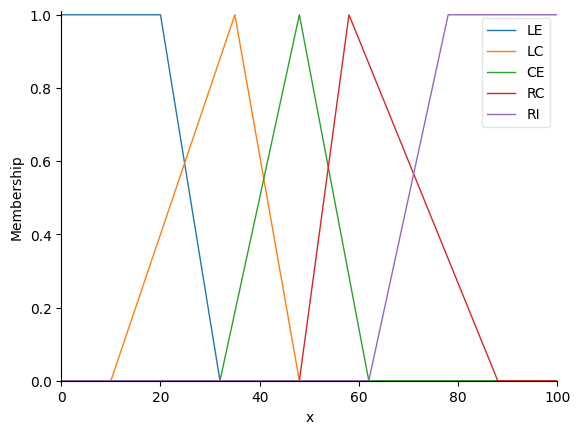

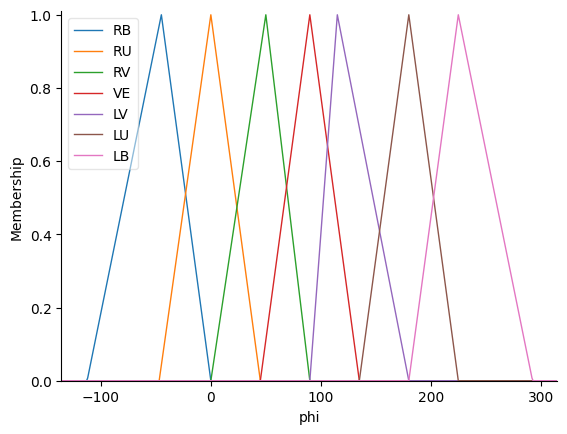

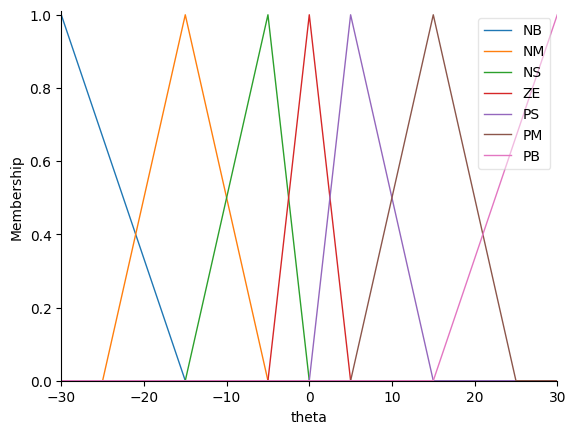

In [23]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


# Variáveis de entrada
x = ctrl.Antecedent(np.arange(0, 101, 1), 'x')
phi = ctrl.Antecedent(np.arange(-136, 316, 1), 'phi')

# Variável de saída
theta = ctrl.Consequent(np.arange(-30, 31, 1), 'theta')

# Funções de pertinência para as variáveis de entrada e saída
x['LE'] = fuzz.trapmf(x.universe, [0, 0, 20, 32])
x['LC'] = fuzz.trimf(x.universe, [10, 35, 48])
x['CE'] = fuzz.trimf(x.universe, [32, 48, 62])
x['RC'] = fuzz.trimf(x.universe, [48, 58, 88])
x['RI'] = fuzz.trapmf(x.universe, [62, 78, 100, 100])

phi['RB'] = fuzz.trimf(phi.universe, [-112.5, -45, 0])
phi['RU'] = fuzz.trimf(phi.universe, [-47, 0, 45])
phi['RV'] = fuzz.trimf(phi.universe, [0, 50, 90])
phi['VE'] = fuzz.trimf(phi.universe, [45, 90, 135])
phi['LV'] = fuzz.trimf(phi.universe, [90, 115, 180])
phi['LU'] = fuzz.trimf(phi.universe, [135, 180, 225])
phi['LB'] = fuzz.trimf(phi.universe, [180, 225, 292.5 ])

theta['NB'] = fuzz.trimf(theta.universe, [-30, -30, -15])
theta['NM'] = fuzz.trimf(theta.universe, [-25, -15, -5])
theta['NS'] = fuzz.trimf(theta.universe, [-15, -5, 0])
theta['ZE'] = fuzz.trimf(theta.universe, [-5, 0, 5])
theta['PS'] = fuzz.trimf(theta.universe, [0, 5, 15])
theta['PM'] = fuzz.trimf(theta.universe, [5, 15, 25])
theta['PB'] = fuzz.trimf(theta.universe, [15, 30, 30])

# Regras fuzzy
rule1 = ctrl.Rule(x['LE'] & phi['RB'], theta['PS'])
rule2 = ctrl.Rule(x['LC'] & phi['RB'], theta['PM'])
rule3 = ctrl.Rule(x['CE'] & phi['RB'], theta['PM'])
rule4 = ctrl.Rule(x['RC'] & phi['RB'], theta['PB'])
rule5 = ctrl.Rule(x['RI'] & phi['RB'], theta['PB'])
rule6 = ctrl.Rule(x['LE'] & phi['RU'], theta['NS'])
rule7 = ctrl.Rule(x['LC'] & phi['RU'], theta['PS'])
rule8 = ctrl.Rule(x['CE'] & phi['RU'], theta['PM'])
rule9 = ctrl.Rule(x['RC'] & phi['RU'], theta['PB'])
rule10 = ctrl.Rule(x['RI'] & phi['RU'], theta['PB'])
rule11 = ctrl.Rule(x['LE'] & phi['RV'], theta['NM'])
rule12 = ctrl.Rule(x['LC'] & phi['RV'], theta['NS'])
rule13 = ctrl.Rule(x['CE'] & phi['RV'], theta['PS'])
rule14 = ctrl.Rule(x['RC'] & phi['RV'], theta['PM'])
rule15 = ctrl.Rule(x['RI'] & phi['RV'], theta['PB'])
rule16 = ctrl.Rule(x['LE'] & phi['VE'], theta['NM'])
rule17 = ctrl.Rule(x['LC'] & phi['VE'], theta['NM'])
rule18 = ctrl.Rule(x['CE'] & phi['VE'], theta['ZE'])
rule19 = ctrl.Rule(x['RC'] & phi['VE'], theta['PM'])
rule20 = ctrl.Rule(x['RI'] & phi['VE'], theta['PM'])
rule21 = ctrl.Rule(x['LE'] & phi['LV'], theta['NB'])
rule22 = ctrl.Rule(x['LC'] & phi['LV'], theta['NM'])
rule23 = ctrl.Rule(x['CE'] & phi['LV'], theta['NS'])
rule24 = ctrl.Rule(x['RC'] & phi['LV'], theta['PS'])
rule25 = ctrl.Rule(x['RI'] & phi['LV'], theta['PM'])
rule26 = ctrl.Rule(x['LE'] & phi['LU'], theta['NB'])
rule27 = ctrl.Rule(x['LC'] & phi['LU'], theta['NB'])
rule28 = ctrl.Rule(x['CE'] & phi['LU'], theta['NM'])
rule29 = ctrl.Rule(x['RC'] & phi['LU'], theta['NS'])
rule30 = ctrl.Rule(x['RI'] & phi['LU'], theta['PS'])
rule31 = ctrl.Rule(x['LE'] & phi['LB'], theta['NB'])
rule32 = ctrl.Rule(x['LC'] & phi['LB'], theta['NB'])
rule33 = ctrl.Rule(x['CE'] & phi['LB'], theta['NM'])
rule34 = ctrl.Rule(x['RC'] & phi['LB'], theta['NM'])
rule35 = ctrl.Rule(x['RI'] & phi['LB'], theta['NS'])

#Sistema de controle fuzzy
ctrl_sys = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27, rule28, rule29, rule30, rule31, rule32, rule33, rule34, rule35])

theta.defuzzify_method = 'bisector'
#Simulação do sistema de controle fuzzy
sim = ctrl.ControlSystemSimulation(ctrl_sys)

#Entradas para a simulação
sim.input['x'] = 35
sim.input['phi'] = -10

#Computação da saída
sim.compute()

#Visualização das funções de pertinência
x.view()
phi.view()
theta.view()

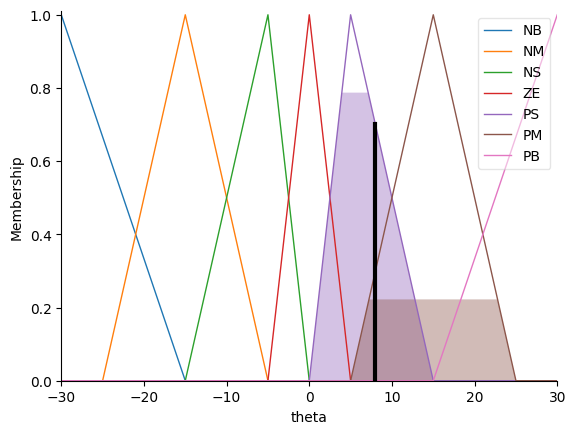

In [24]:
theta.view(sim=sim)

In [25]:
print(f"SAIDA {sim.output['theta']}")

SAIDA 7.978877826438847
